# Unsupervised Machine Learning

### This script contains the following points:
1. Importing libraries
2. Importing data
   * Clean and reprocess data
   * Standardize data
3. Using the elbow technique
4. Decide how many clusters implememented in algorithm
5. Run k-means algorithm
6. Attach a new column to dataframe with resulting clusters
7. Create a few visualations using clustered data
8. Discuss how and why clusters make sense
9. Calculate descriptive statistics for clusters
10. Discuss results that are relevant to next analytical steps

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import plotly.express as px
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA

import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import plotly.express as px

In [2]:
%matplotlib inline

### 2. Importing data

In [3]:
path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 6 - Advanced Analytics_Dashboard\2019-2021 CDC Natality'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_flags.pkl'))

In [5]:
df.head()

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
0,0,Alabama,2019,January,1,high school GED or less,10,34,3223.149902,27.440001,38.820000,2019-01-01,Winter,South,NBW,not preterm,26-28,average,old
1,1,Alabama,2019,January,1,high school GED or less,2,30,3482.770020,29.930000,39.070000,2019-01-01,Winter,South,NBW,not preterm,28-30,highest,oldest
2,2,Alabama,2019,January,1,high school GED or less,3,25,3251.959961,30.760000,38.639999,2019-01-01,Winter,South,NBW,not preterm,30-32,average,old
3,3,Alabama,2019,January,1,high school GED or less,4,25,3120.399902,28.639999,38.119999,2019-01-01,Winter,South,NBW,not preterm,28-30,low,young
4,4,Alabama,2019,January,1,high school GED or less,5,12,2938.080078,27.920000,37.500000,2019-01-01,Winter,South,NBW,not preterm,26-28,lowest,youngest


In [6]:
df.shape

(86437, 19)

#### a) Clean & process data

In [7]:
df_trunc = df[['mother_ed','prenatal_start','births','birth_wt_avg','mother_age_avg','gest_age_avg']] 

In [8]:
df_trunc.head()

,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg
0,high school GED or less,10,34,3223.149902,27.440001,38.820000
1,high school GED or less,2,30,3482.770020,29.930000,39.070000
2,high school GED or less,3,25,3251.959961,30.760000,38.639999
3,high school GED or less,4,25,3120.399902,28.639999,38.119999
4,high school GED or less,5,12,2938.080078,27.920000,37.500000


In [9]:
df_trunc.shape

(86437, 6)

In [10]:
# Viewing all the mother_ed values.

df_trunc['mother_ed'].value_counts(dropna=False)

high school GED or less             36147
associate degree or some college    23084
bachelor's degree                   11915
master's degree                      8418
doctorate or professional degree     4600
unknown or not stated                2273
Name: mother_ed, dtype: int64

In [11]:
# Making mother_ed a numerical column, so it is suitable for k-means cluster analysis.

df_trunc.loc[df_trunc['mother_ed'] == "unknown or not stated", 'mother_ed'] = 0
df_trunc.loc[df_trunc['mother_ed'] == "high school GED or less", 'mother_ed'] = 1
df_trunc.loc[df_trunc['mother_ed'] == "associate degree or some college", 'mother_ed'] = 2
df_trunc.loc[df_trunc['mother_ed'] == "bachelor's degree", 'mother_ed'] = 3
df_trunc.loc[df_trunc['mother_ed'] == "master's degree", 'mother_ed'] = 4
df_trunc.loc[df_trunc['mother_ed'] == "doctorate or professional degree", 'mother_ed'] = 5

In [12]:
df_trunc.head()

,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg
0,1,10,34,3223.149902,27.440001,38.820000
1,1,2,30,3482.770020,29.930000,39.070000
2,1,3,25,3251.959961,30.760000,38.639999
3,1,4,25,3120.399902,28.639999,38.119999
4,1,5,12,2938.080078,27.920000,37.500000


In [13]:
df_trunc.tail()

,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg
86432,3,2,56,3292.620117,29.020000,38.750000
86433,3,3,29,3372.899902,32.279999,38.480000
86434,3,4,11,3488.639893,34.730000,38.730000
86435,4,2,22,3173.050049,32.680000,38.270000
86436,4,3,15,3091.070068,33.330002,38.470001


In [14]:
# Seeing if mother_ed variable is currently numeric.

df_trunc.dtypes

# No, we must change the data type of this column.

mother_ed          object
prenatal_start      int32
births              int32
birth_wt_avg      float32
mother_age_avg    float32
gest_age_avg      float32
dtype: object

In [15]:
# Changing data type of mother_ed.

df_trunc['mother_ed'] = df_trunc['mother_ed'].astype('int8')

C:\Users\keely\AppData\Local\Temp\ipykernel_2668\3002966390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trunc['mother_ed'] = df_trunc['mother_ed'].astype('int8')


In [16]:
df_trunc.dtypes

mother_ed            int8
prenatal_start      int32
births              int32
birth_wt_avg      float32
mother_age_avg    float32
gest_age_avg      float32
dtype: object

In [17]:
df_trunc['mother_ed'].value_counts(dropna=False)

1    36147
2    23084
3    11915
4     8418
5     4600
0     2273
Name: mother_ed, dtype: int64

#### b) Standarize the data set

In [18]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_trunc)

In [19]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [20]:
pca.explained_variance_ratio_

array([0.40059184, 0.2122437 , 0.18091358, 0.11841194, 0.04974474,
       0.0380942 ])

Text(0, 0.5, 'Cumulative Explained Variance')

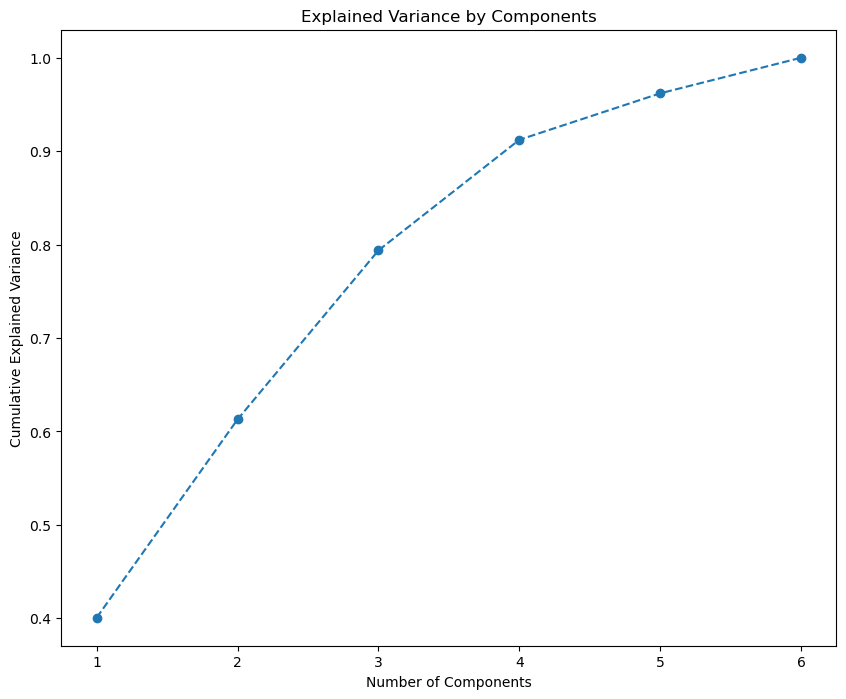

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Three components is sufficients, as this includes about 80% of the variance. Four components, which comprises 90% of the variance is also acceptable.

In [23]:
# Choice of three components based on the above results.

pca = PCA(n_components = 3)

In [24]:
# Fitting model to data:

pca.fit(segmentation_std)

PCA(n_components=3)

In [25]:
# Show calculated components results for the data set.

pca.transform(segmentation_std)

array([[ 1.14311644, -0.26505354, -1.69386497],
       [-1.20814066, -1.28992981, -0.76039943],
       [-0.26618242, -0.33197188, -0.19269861],
       ...,
       [-2.28471367,  0.76313419, -0.72957282],
       [-1.39248451,  1.50183295,  0.6385236 ],
       [-1.24723293,  1.75633979,  0.52863702]])

In [26]:
scores_pca = pca.transform(segmentation_std)

### 3. Using the elbow technique

In [27]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [28]:
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

In [29]:
score

[-411655.75691478944,
 -277789.1785439243,
 -212284.77971472772,
 -175388.06176669017,
 -150937.52502333562,
 -135480.0498052299,
 -122051.23675491737,
 -111282.9696556887,
 -101752.61205084863]

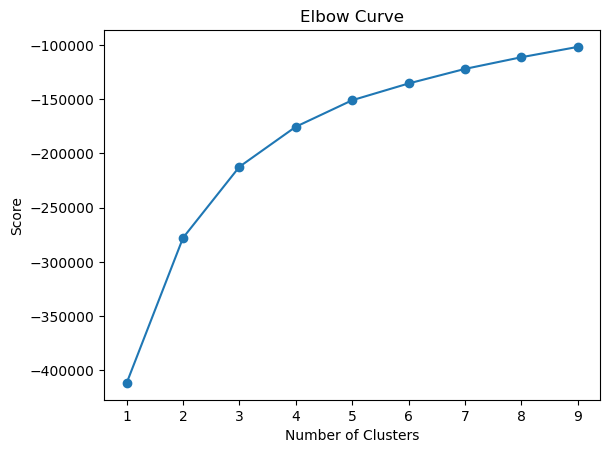

In [30]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score,marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. Decide how many clusters should be implemented in algorithm

From the plot above, the ideal numbre of clusters is three. After three, the line remains relatively smooth.

### 5. Run k-means algorithm

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [32]:
# Fit the k-means object to the data.

kmeans.fit(scores_pca)

KMeans(n_clusters=3)

In [33]:
# Concatenating previous dataframe, df_trunc, with the three new preprocessed componenets from dimensionality reduction
# or PCA. Then, we assign cluster values to kmeans_labels_ for easy map labeling.

df_pca_kmeans = pd.concat([df_trunc.reset_index(drop=True),pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['comp_1', 'comp_2', 'comp_3']
df_pca_kmeans['clusters'] = kmeans.labels_

In [34]:
df_pca_kmeans.head()

,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,comp_1,comp_2,comp_3,clusters
0,1,10,34,3223.149902,27.440001,38.820000,1.143116,-0.265054,-1.693865,2
1,1,2,30,3482.770020,29.930000,39.070000,-1.208141,-1.289930,-0.760399,2
2,1,3,25,3251.959961,30.760000,38.639999,-0.266182,-0.331972,-0.192699,2
3,1,4,25,3120.399902,28.639999,38.119999,0.912540,-0.016743,0.103103,2
4,1,5,12,2938.080078,27.920000,37.500000,2.083730,0.713645,0.583245,0


In [35]:
df_pca_kmeans['clusters'].value_counts()

2    45474
1    25454
0    15509
Name: clusters, dtype: int64

In [36]:
# Create a new Segment column for easier cluster readabilty

df_pca_kmeans['Segment'] = df_pca_kmeans['clusters'].map({0: 'first', 
                                                         1: 'second', 
                                                         2: 'third'})

In [37]:
df_pca_kmeans.head()

,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,comp_1,comp_2,comp_3,clusters,Segment
0,1,10,34,3223.149902,27.440001,38.820000,1.143116,-0.265054,-1.693865,2,third
1,1,2,30,3482.770020,29.930000,39.070000,-1.208141,-1.289930,-0.760399,2,third
2,1,3,25,3251.959961,30.760000,38.639999,-0.266182,-0.331972,-0.192699,2,third
3,1,4,25,3120.399902,28.639999,38.119999,0.912540,-0.016743,0.103103,2,third
4,1,5,12,2938.080078,27.920000,37.500000,2.083730,0.713645,0.583245,0,first


In [38]:
df_pca_kmeans['Segment'].value_counts()

third     45474
second    25454
first     15509
Name: Segment, dtype: int64

In [39]:
# Providing centroid values, so they can be visible in the plots.

centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.13604895  0.84534632  0.31187561]
 [-1.71695029  0.74647439  0.08637026]
 [ 0.22876892 -0.7082274  -0.15540236]]


In [40]:
df_pca_kmeans.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_kmeans_clusters.csv'))


### 7. Create a few visualization using clustered data

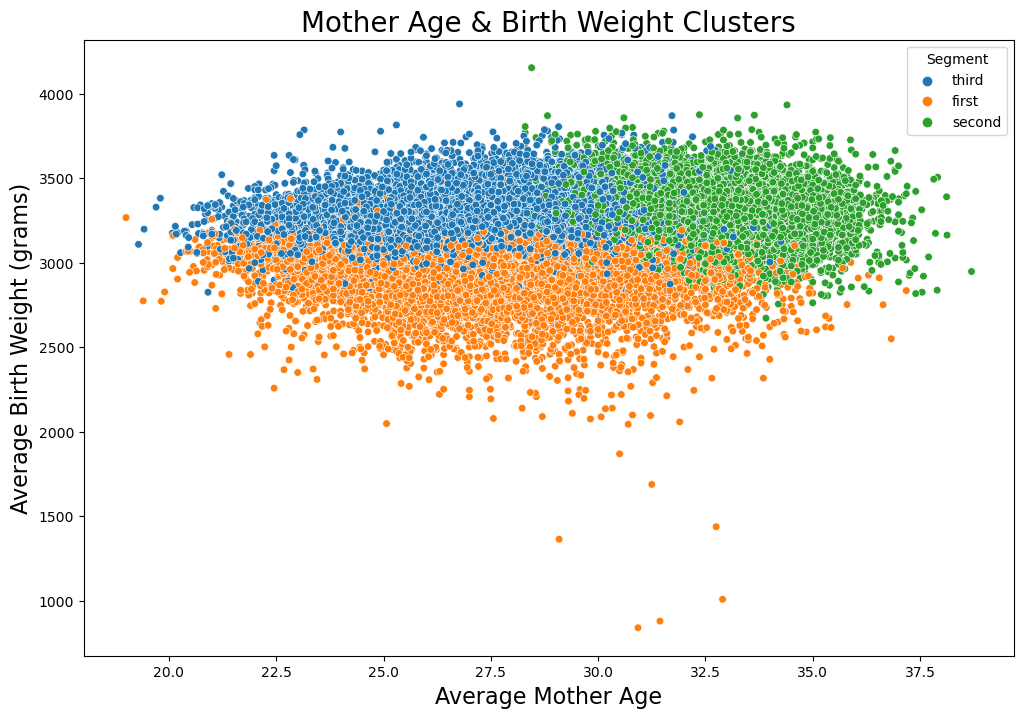

In [41]:
# Plot clusters for the mom_age_avg and birth_wt_avg variables

plt.figure(figsize=(12,8))
mom_age_bwt_cluster = sns.scatterplot(x=df_pca_kmeans['mother_age_avg'], y=df_pca_kmeans['birth_wt_avg'], hue=df_pca_kmeans['Segment'], s=30)


plt.xlabel('Average Mother Age',fontsize=16)
plt.ylabel('Average Birth Weight (grams)',fontsize=16)
plt.title('Mother Age & Birth Weight Clusters',fontsize=20)
plt.show()

In [ ]:
mom_age_bwt_cluster.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mom_age_wt_cluster.png'), bbox_inches='tight')

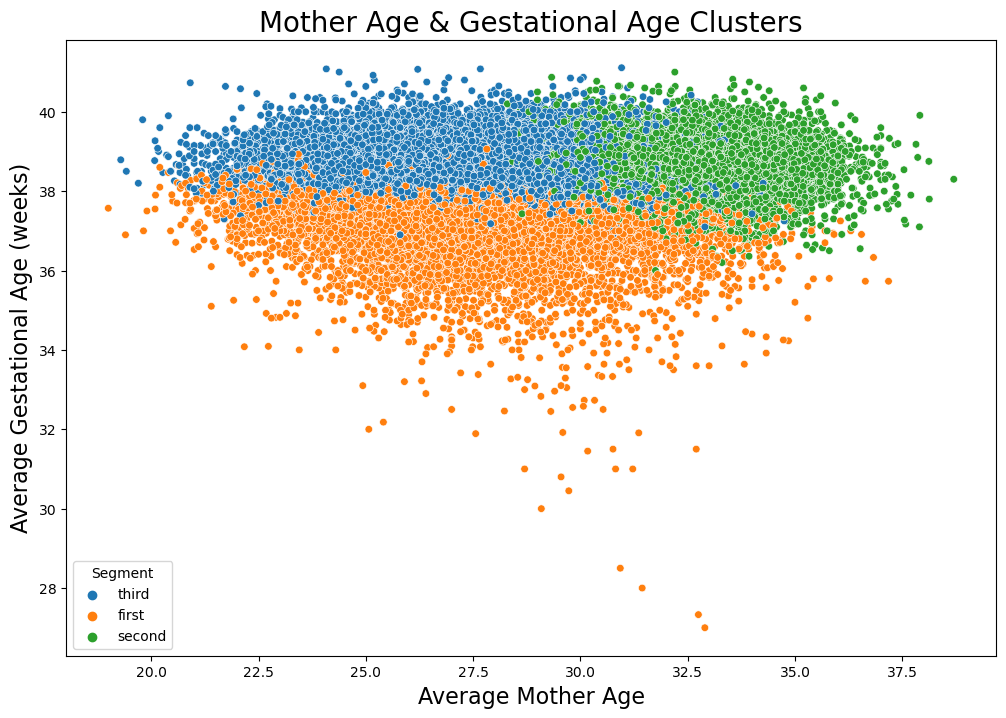

In [42]:
# Plot clusters for the mom_age_avg and gest_age_avg variables

plt.figure(figsize=(12,8))
mom_age_gest_cluster = sns.scatterplot(x=df_pca_kmeans['mother_age_avg'], y=df_pca_kmeans['gest_age_avg'], hue=df_pca_kmeans['Segment'], s=30)


plt.xlabel('Average Mother Age',fontsize=16)
plt.ylabel('Average Gestational Age (weeks)',fontsize=16)
plt.title('Mother Age & Gestational Age Clusters',fontsize=20)
plt.show()

In [ ]:
mom_age_gest_cluster.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mom_age_gest_cluster.png'), bbox_inches='tight')

### Much of the visualizations below had their output cleared to allow the file size to be small enough to upload to GitHub.

In [ ]:
# Plot clusters for the mother_ed and birth_wt_avg variables.

plt.figure(figsize=(12,8))
mom_ed_bwt_cluster = sns.scatterplot(x=df_pca_kmeans['mother_ed'], y=df_pca_kmeans['birth_wt_avg'], hue=df_pca_kmeans['Segment'], s=30)


plt.xlabel('Mother Education',fontsize=16)
plt.ylabel('Birth Weight Average (grams)',fontsize=16)
plt.title('Mother Education & Birth Weight Clusters',fontsize=20)
plt.show()

In [ ]:
mom_ed_bwt_cluster.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mom_ed_bwt_cluster.png'), bbox_inches='tight')

In [ ]:
# Plot clusters for the mother_ed and gest_age_avg variables.

plt.figure(figsize=(12,8))
mom_ed_gest_cluster = sns.scatterplot(x=df_pca_kmeans['mother_ed'], y=df_pca_kmeans['gest_age_avg'], hue=df_pca_kmeans['Segment'], s=30)


plt.xlabel('Mother Education',fontsize=16)
plt.ylabel('Gestational Age Average (weeks)',fontsize=16)
plt.title('Mother Education & Gestational Age Clusters',fontsize=20)
plt.show()

In [ ]:
mom_ed_gest_cluster.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mom_ed_gest_cluster.png'), bbox_inches='tight')

In [ ]:
# Plot clusters for the mother_ed and prenatal_start variables.

plt.figure(figsize=(12,8))
mom_age_prenatal_cluster = sns.scatterplot(x=df_pca_kmeans['mother_age_avg'], y=df_pca_kmeans['prenatal_start'], hue=df_pca_kmeans['Segment'], s=30)

plt.xlabel('Average Mother Age',fontsize=16)
plt.ylabel('Prenatal Start Month (month of gestation)',fontsize=16)
plt.title('Mother Age & Prenatal Start Month',fontsize=20)
plt.show()

In [ ]:
mom_age_prenatal_cluster.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mom_age_prenatal_cluster.png'), bbox_inches='tight')

In [ ]:
# Create a 3d scatterplot of mother_age_avg, birth_wt_avg, and gest_age_avg with plotly.

age_bwt_gest = px.scatter_3d(df_pca_kmeans, x='mother_age_avg', y='birth_wt_avg', z='gest_age_avg', title="Mother Age, Birth Weight, & Gestation", color='Segment')
age_bwt_gest.update_layout(legend= {'itemsizing': 'constant'})
age_bwt_gest.update_scenes(xaxis_title_text='Mother Age',  
                  yaxis_title_text='Birth Wt (grams)',  
                  zaxis_title_text='Gestational (weeks)')

age_bwt_gest.show()

In [ ]:
# Save 3d plot:

age_bwt_gest.write_html(os.path.join(path, '04 Analysis', 'Visualizations', 'age_bwt_gest_3d.html'))

In [ ]:
# Create a 3d scatterplot of mother_ed, birth_wt_avg, and gest_age_avg with plotly.

ed_bwt_gest = px.scatter_3d(df_pca_kmeans, x='mother_ed', y='birth_wt_avg', z='gest_age_avg', title="Mother Education, Birth Weight, & Gestation", color='Segment')
ed_bwt_gest.update_layout(legend= {'itemsizing': 'constant'})
ed_bwt_gest.update_scenes(xaxis_title_text='Mother Education',  
                  yaxis_title_text='Birth Wt (grams)',  
                  zaxis_title_text='Gestation (weeks)')

ed_bwt_gest.show()

In [ ]:
# Save 3d plot:

ed_bwt_gest.write_html(os.path.join(path, '04 Analysis', 'Visualizations', 'ed_bwt_gest_3d.html'))

In [ ]:
# Create a 3d scatterplot of mother_age_avg, birth_wt_avg, and prenatal_start with plotly.

age_bwt_pren_cluster = px.scatter_3d(df_pca_kmeans, x='mother_age_avg', y='birth_wt_avg', z='prenatal_start', title="Mother Age, Birth Weight, & Prenatal Start", color='Segment')
age_bwt_pren_cluster.update_layout(legend= {'itemsizing': 'constant'})
age_bwt_pren_cluster.update_scenes(xaxis_title_text='Mother Age',  
                  yaxis_title_text='Birth Wt (grams)',  
                  zaxis_title_text='Prenatal Start')

age_bwt_pren_cluster.show()

In [ ]:
# Save 3d plot:

age_bwt_pren_cluster.write_html(os.path.join(path, '04 Analysis', 'Visualizations', 'age_bwt_pren_3D.html'))

In [ ]:
# Create a 3d scatterplot of mother_age_avg, gest_age_avg, and prenatal_start with plotly.

age_gest_pren = px.scatter_3d(df_pca_kmeans, x='mother_age_avg', y='gest_age_avg', z='prenatal_start', title="Mother Age, Gestation, & Prenatal Start", color='Segment')
age_gest_pren.update_layout(legend= {'itemsizing': 'constant'})
age_gest_pren.update_scenes(xaxis_title_text='Mother Age',  
                  yaxis_title_text='Gestational Age (weeks)',  
                  zaxis_title_text='Prenatal Start')

age_gest_pren.show()

In [ ]:
# Save 3d plot:

age_gest_pren.write_html(os.path.join(path, '04 Analysis', 'Visualizations', 'age_gest_pren_3D.html'))

In [ ]:
# Create a 3d scatterplot of mother_ed, birth_wt_age, and prenatal_start with plotly.

ed_bwt_pren = px.scatter_3d(df_pca_kmeans, x='mother_ed', y='birth_wt_avg', z='prenatal_start', title="Mother Education, Birth Weight, & Prenatal Start", color='Segment')
ed_bwt_pren.update_layout(legend= {'itemsizing': 'constant'})
ed_bwt_pren.update_scenes(xaxis_title_text='Mother Education',  
                  yaxis_title_text='Birth Weight (grams)',  
                  zaxis_title_text='Prenatal Start')

ed_bwt_pren.show()

In [ ]:
# Save 3d plot:

ed_bwt_pren.write_html(os.path.join(path, '04 Analysis', 'Visualizations', 'ed_bwt_pren_3D.html'))

In [ ]:
mom_age_wt_cluster.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mom_age_wt_cluster.png'), bbox_inches='tight')


### 8. Discuss how and why clusters make sense

In these visualizations, you can clearly see three primary clusters: below birth weight/below gestational age, average birth weight/average gestational age, and finally above average birth weight/above average gestational age along with the age groups that accompany each of these categories. For example, below average and average birth weights and gestational ages span a variety of mother ages (red and blue, respectively), but decrease in older women. Older women with high birth weight infants with longer gestational times are colored green in these plots. 

Some other things you can see is a greater amount of lower than average birth weights among younger women and less educated who started prenatal care later (4-5th month) while women who are older and more educated experienced far less variation in birth weight and gestational age, regardless of level of prenatal care. 

### 9. Calculate descriptive statistics for clusters

In [45]:
df_pca_kmeans.groupby('Segment').agg({'mother_age_avg':['mean', 'median'], 
                         'mother_ed':['mean', 'median'], 
                         'births':['mean', 'median'],
                         'birth_wt_avg':['mean', 'median'],
                         'gest_age_avg':['mean', 'median'],
                          'prenatal_start':['mean', 'median']})

mother_age_avg            mother_ed             births         \
                  mean     median      mean median        mean median   
Segment                                                                 
first        27.359776  27.150000  1.351151    1.0   35.948610   24.0   
second       32.369301  32.330002  3.607174    4.0  146.827257   43.0   
third        27.683207  27.730000  1.362537    1.0  142.318776   48.0   

        birth_wt_avg              gest_age_avg            prenatal_start  \
                mean       median         mean     median           mean   
Segment                                                                    
first    2989.961182  3019.219971    37.373024  37.560001       6.442453   
second   3310.072510  3315.310059    38.689148  38.709999       3.574409   
third    3246.443848  3240.790039    38.576035  38.540001       4.143884   

                
        median  
Segment         
first      6.0  
second     3.0  
third      4.0

### 10. Discuss results that are relevant to next analytical steps

It would be helpful to determine how much education is a factor in birth weight and gestational age or if education is tied to age in regards to these two statistics. Also, it would be helpful to know if the statistics of these three groups changes over time. Also, it seems that prenatal care start month may not have the beneficial effect one might hope, but more analysis into this would also be insightful. 